# Question-1

In [1]:
#pip install scipy plotly

In [2]:
import math
import numpy as np
import scipy.stats as si
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## black-scholes
$$ d_1=\frac{ln(\frac{S_0}{K})+(r+\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}} $$  
$$ d_2=d_1-\sigma\sqrt{T} $$
$$ p=Ke^{-rT}N(-d_2)-SN(-d_1) $$

In [3]:
#define blackScholes
class BlackScholesModel:
    def __init__(self, S, K, t, T, sigma, r):
        self.S = S         # Underlying asset price
        self.K = K         # Option strike price
        self.t = t         # Time to expiration in year
        self.T = T         # Option maturity
        self.sigma = sigma # Volatility of the underlying asset
        self.r = r         # Risk-free interest rate
        
    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma **2) * self.T) / (self.sigma * np.sqrt(self.T))
    
    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)
    
    def call_option_price(self):
        return (self.S * si.norm.cdf(self.d1(), 0.0, 1.0) - self.K * np.exp(-self.r * self.T) * si.norm.cdf(self.d2(), 0.0, 1.0))
    
    def put_option_price(self):
        return (self.K * np.exp(-self.r * self.T) * si.norm.cdf(-self.d2(), 0.0, 1.0) - self.S * si.norm.cdf(-self.d1(), 0.0, 1.0))
    

In [4]:
bsm_1=BlackScholesModel(S=100, K=100, t=0, T=0.5, sigma=0.2, r=0.01)
print(f"Call Option Price:{bsm_1.call_option_price()}")
print(f"Put Option Price:{bsm_1.put_option_price()}")

Call Option Price:5.876024233827607
Put Option Price:5.377272153095845


In [5]:
bsm_2=BlackScholesModel(S=100, K=110, t=0, T=0.5, sigma=0.2, r=0.01)
print(f"Call Option Price:{bsm_2.call_option_price()}")
print(f"Put Option Price:{bsm_2.put_option_price()}")

Call Option Price:2.339420513720004
Put Option Price:11.790793224915063


In [6]:
bsm_3=BlackScholesModel(S=100, K=100, t=0, T=1.0, sigma=0.2, r=0.01)
print(f"Call Option Price:{bsm_3.call_option_price()}")
print(f"Put Option Price:{bsm_3.put_option_price()}")

Call Option Price:8.433318690109608
Put Option Price:7.438302065026413


In [7]:
bsm_4=BlackScholesModel(S=100, K=100, t=0, T=0.5, sigma=0.3, r=0.01)
print(f"Call Option Price:{bsm_4.call_option_price()}")
print(f"Put Option Price:{bsm_4.put_option_price()}")

Call Option Price:8.677645562336004
Put Option Price:8.178893481604248


In [8]:
bsm_5=BlackScholesModel(S=100, K=100, t=0, T=0.5, sigma=0.2, r=0.02)
print(f"Call Option Price:{bsm_5.call_option_price()}")
print(f"Put Option Price:{bsm_5.put_option_price()}")

Call Option Price:6.120654113455842
Put Option Price:5.1256374883726465


## how each parameter affects the call and put option values

In [9]:
def plot_option_sensitivity(bs_model, parameter, values, option_type='call'):
    prices = []
    for value in values:
        setattr(bs_model, parameter, value)
        if option_type == 'call':
            prices.append(bs_model.call_option_price())
        if option_type == 'put':
            prices.append(bs_model.put_option_price())
            
    plt.figure(figsize=(10, 5))
    plt.plot(values, prices)
    plt.title(f'{option_type.capitalize()} Option Price Sensitivity to {parameter.capitalize()}')
    plt.xlabel(parameter.capitalize())
    plt.ylabel('Option Price')
    plt.grid(True)

### strike

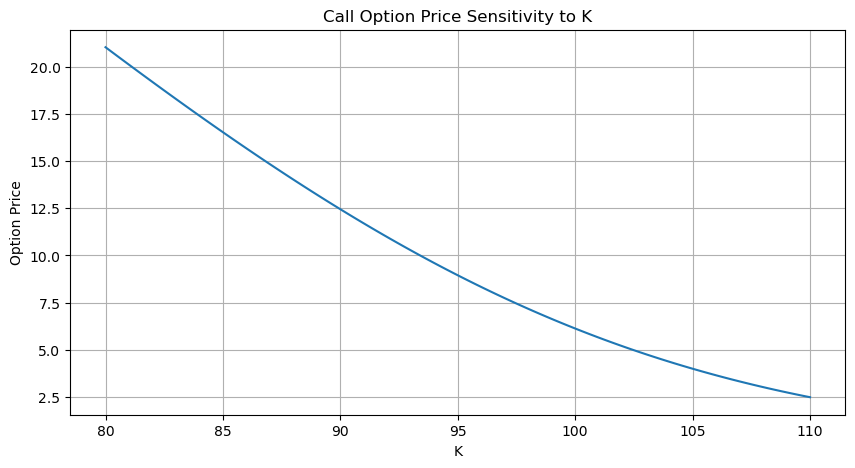

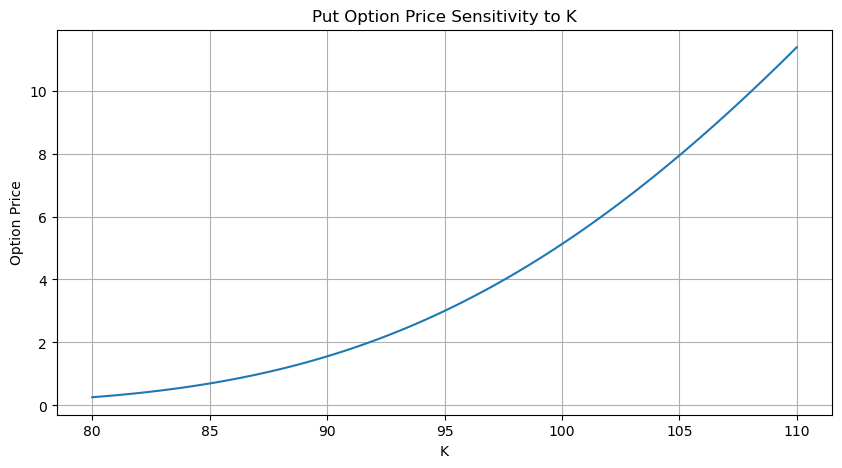

In [10]:
strikes=np.linspace(80, 110, 100)
plot_option_sensitivity(bsm_5, 'K', strikes, 'call')
plot_option_sensitivity(bsm_5, 'K', strikes, 'put')

### maturity

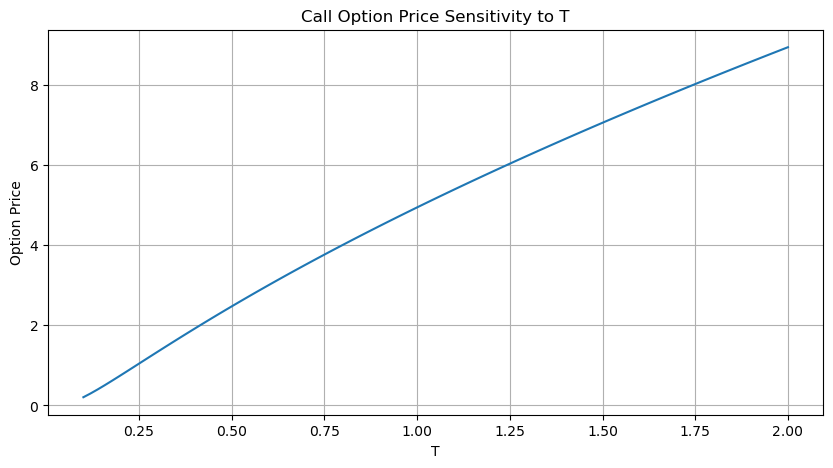

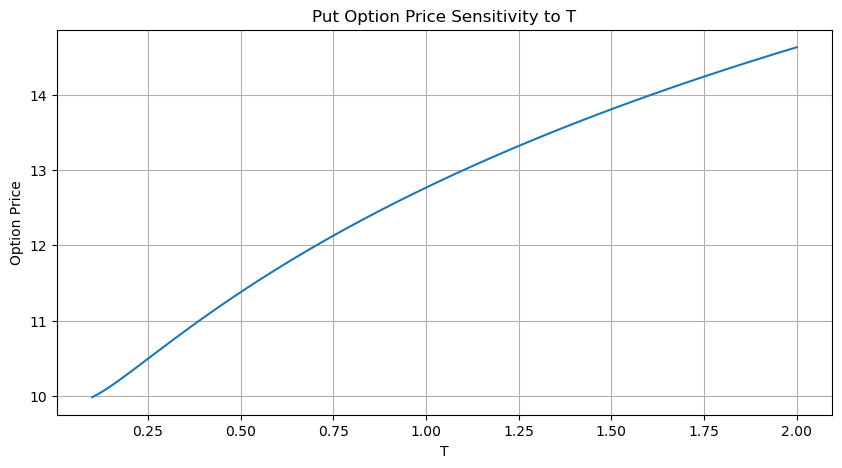

In [11]:
maturities=np.linspace(0.1, 2.0, 100)
plot_option_sensitivity(bsm_5, 'T', maturities, 'call')
plot_option_sensitivity(bsm_5, 'T', maturities, 'put')

### volatility

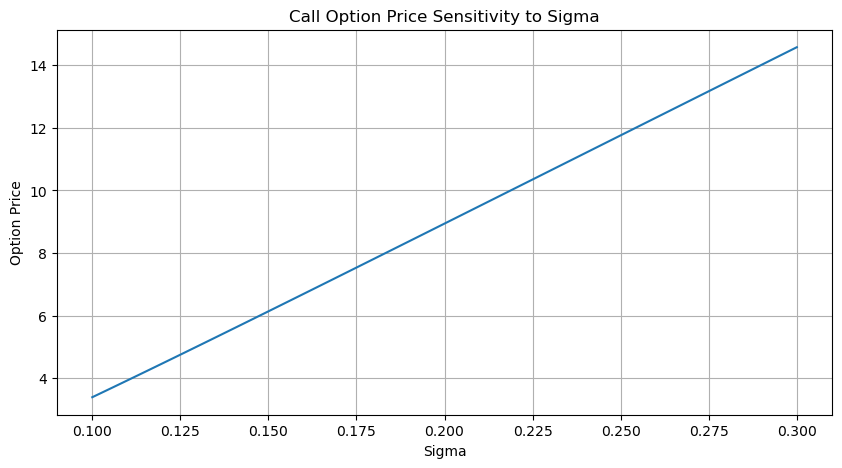

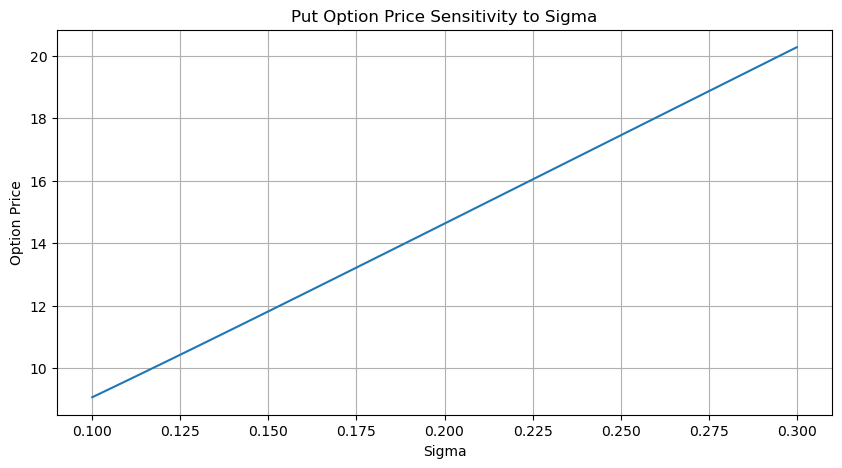

In [12]:
volatilities=np.linspace(0.1, 0.3, 100)
plot_option_sensitivity(bsm_5, 'sigma', volatilities, 'call')
plot_option_sensitivity(bsm_5, 'sigma', volatilities, 'put')

### risk free rate

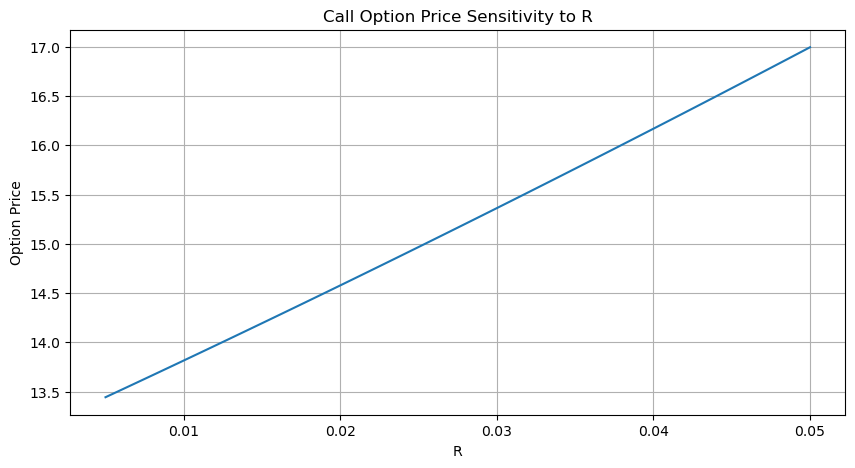

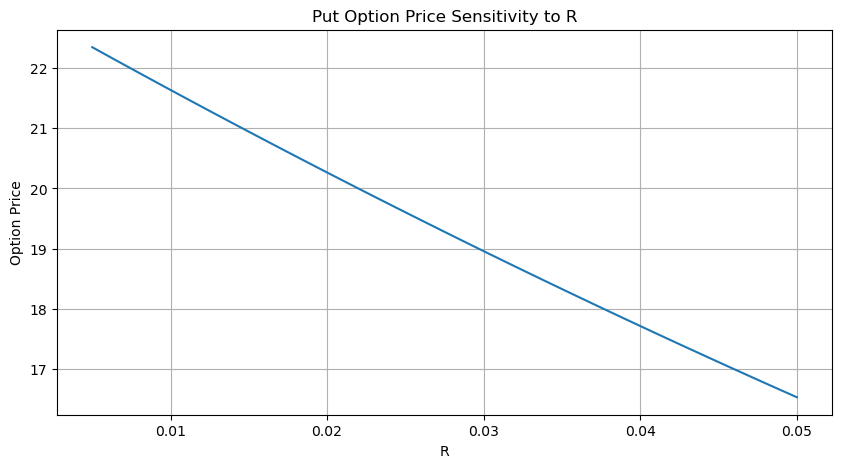

In [13]:
rates=np.linspace(0.005, 0.05, 100)
plot_option_sensitivity(bsm_5, 'r', rates, 'call')
plot_option_sensitivity(bsm_5, 'r', rates, 'put')

## conclusion  
How each parameter affects the call and put option prices are concluded in the following table, where "+" means positively correlated and "-" means negatively correlated  

|  |  call option   | put option  |
| :----: |  :----:  | :----:  |
| strike price |  -  | +  |
| maturity | +  | + |
| volatility | +  | + |
| risk free rate | +  | - |


# Question 2

In [14]:
import math
import pandas as pd
import numpy as np
from numpy.random import seed
from numpy.random import normal

# generate 200 samples
X = normal(loc=0, scale=1, size=200)
Y = normal(loc=0, scale=1, size=200)
print(X[0:5])
print(Y[0:5])

# Z = ρX+sqrt{(1 − ρ^2)}Y
ρ = 0.5
Z = ρ * X + math.sqrt(1 - ρ ** 2) * Y
print(Z[0:5])

Corr = np.corrcoef(X,Z)
print(f'Corr={Corr[1,0]}')

corr_2f=round(Corr[1,0],1)
print(corr_2f)

#At the level of one decimal place and 200 samples, the correlation coefficient a is equal to the coefficient ρ.

[-2.65019825  0.2048212   1.24317045 -0.54199333 -0.65973604]
[-0.30012425  1.7944879   1.94099923 -0.94823286  0.94877296]
[-1.58501435  1.6564827   2.30253986 -1.09219041  0.49179346]
Corr=0.5895681803063415
0.6


# Question 3
## 3.1

In [15]:
from scipy.stats import norm
n = norm.pdf
N = norm.cdf

class IV:
    
    def __init__(self, S, K, C_true, T, cp_flag, r=0.04, q=0.2, t=0,initial_sigma=0.0, iterations=1000, precision=1.0e-7):
        '''
        s=stock pric，k=strike price，market_price=market price of option，T=maturity，r=risk free rate，
        cp_flag=option type，initial_value=initial guess of volatility，iteration，precision
        '''
        self.S = float(S)         # Underlying asset price
        self.K = float(K)         # Option strike price
        self.C_true = float(C_true) #market true price of the option
        self.T = T         # Option maturity
        self.t = t         # Time to expiration in year
        self.r = r         # Risk-free interest rate
        self.q = q         # repo rate
        self.cp_flag = cp_flag # Type of option: C for call option & P for put
        self.initial_sigma = initial_sigma
        self.iterations = iterations 
        self.precision = precision

    def bs_price(self, v):
        '''
        cp_flag - type of option
        q - repo rate
        '''

        d1 = (np.log(self.S/self.K) + (self.r - q) * (self.T - self.t)) / (v * np.sqrt(self.T - self.t)) + 0.5 * v * np.sqrt(self.T - self.t)
        d2 = d1 - v * np.sqrt(self.T - self.t)
        if cp_flag == 'C':
            V = self.S * np.exp(-q * (self.T - self.t)) * N(d1) - self.K * np.exp(-self.r*(self.T - self.t)) * N(d2)
        else:
            V = self.K * np.exp(-self.r * (self.T - self.t)) * N(-d2) - self.S * np.exp(-q * (self.T - self.t)) * N(-d1)
        return V
    
    def bs_vega(self, v):
        d1 = (np.log(self.S/self.K) + (self.r - q) * (self.T - self.t)) / (v * np.sqrt(self.T - self.t)) + 0.5 * v * np.sqrt(self.T - self.t)
        return self.S * np.exp(-q * (self.T - self.t)) * np.sqrt(self.T - self.t) * n(d1)

    
    def find_imp_vol(self):
        #starting value of sigma
        initial_sigma1 = np.sqrt(2*abs( (np.log(self.S/self.K) + (self.r - q)*(self.T-self.t) )/(self.T - self.t)))
        for i in range(self.iterations):
            
            #stop if the new sigma is negative
            if initial_sigma1<0:
                break
            model_price = self.bs_price(initial_sigma1)            
            vega = self.bs_vega(initial_sigma1)            
            diff = self.C_true - model_price
        
            if abs(diff) < self.precision and model_price>0:
                return initial_sigma1
            initial_sigma1 += diff / vega
        if initial_sigma1>0:
            return initial_sigma1
    

- Example
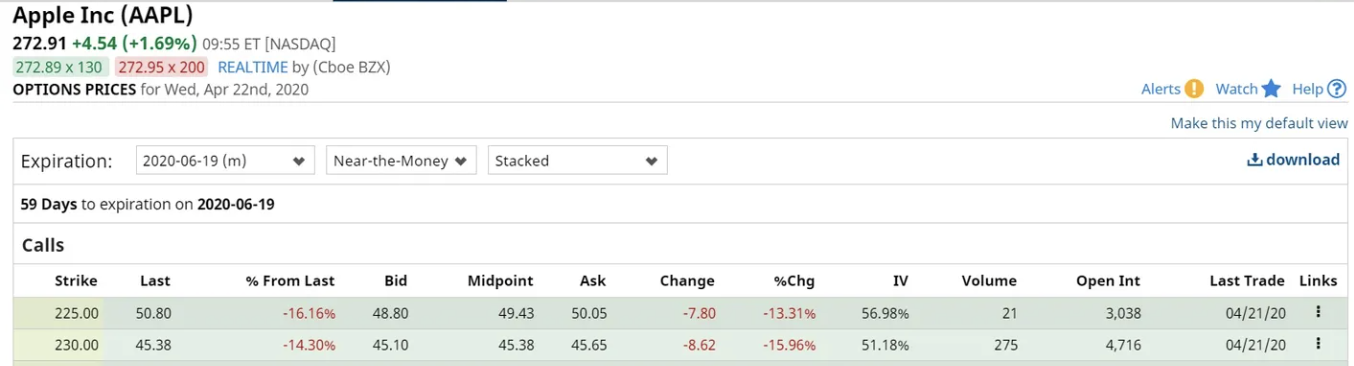

In [16]:
# parameters 
C_true=49.43 #mid
K=225
T=59/365
t=0
S=268.37
r=0.2
q=0
cp_flag = 'P'
initial_sigma = 0.5
iv1 = IV(S, K, C_true, T, t, r, cp_flag)
sigma1 =iv1.find_imp_vol()
print(sigma1)


1.8950880072717882


## 3.2
### 3.2.1

In [17]:
import pandas as pd
from datetime import datetime
df1 = pd.read_csv("marketdata.csv",encoding="utf-8")
df2 = pd.read_csv("instruments.csv",encoding="utf-8")
df = pd.merge(df1, df2, how = 'outer', on = 'Symbol')
df['Expiry'] = pd.to_datetime(df['Expiry'], format='%Y%m%d')
df['LocalTime'] = pd.to_datetime(df['LocalTime'])

df

,LocalTime,Symbol,Last,Bid1,BidQty1,Ask1,AskQty1,Type,Expiry,Strike,OptionType
0,2016-02-16 09:30:00.048748,10000528,0.1130,0.1060,1,0.1130,1,Option,2016-02-24,2.05,P
1,2016-02-16 09:30:07.572073,10000528,0.1130,0.1078,10,0.1130,1,Option,2016-02-24,2.05,P
2,2016-02-16 09:30:08.574733,10000528,0.1130,0.1088,1,0.1130,1,Option,2016-02-24,2.05,P
3,2016-02-16 09:30:09.590718,10000528,0.1130,0.1088,1,0.1130,1,Option,2016-02-24,2.05,P
4,2016-02-16 09:30:10.614290,10000528,0.1130,0.1088,1,0.1130,1,Option,2016-02-24,2.05,P
...,...,...,...,...,...,...,...,...,...,...,...
2264,2016-02-16 09:31:38.361884,10000504,0.5600,0.4828,6,0.6251,6,Option,2016-02-24,2.50,P
2265,2016-02-16 09:32:28.027804,10000504,0.5600,0.4828,6,0.6251,6,Option,2016-02-24,2.50,P
2266,2016-02-16 09:30:36.695185,10000506,0.6594,0.5827,6,0.7250,5,Option,2016-02-24,2.60,P
2267,2016-02-16 09:31:38.361961,10000506,0.6594,0.5827,6,0.7250,5,Option,2016-02-24,2.60,P


In [18]:
# df_31 = df[df["LocalTime"].str.contains("09:31:00")]
# df_32 = df[df["LocalTime"].str.contains("09:32:00")]
# df_33 = df[df["LocalTime"].str.contains("09:33:00")]
# df_31

In [19]:
# filter the data of equity
df_S = df[df['Type'] == 'Equity']
symbols = list(set(df[df['Symbol']>510050]['Symbol'].tolist()))
minutes = [31,32,33]
columns = ['Strike', 'BidVolP', 'AskVolP', 'BidVolC', 'AskVolC']

#find the latest bid/ask price before the target time

for m in minutes:
    target_time = f"2016-Feb-16 09:{m}:00"
    stock_latest = df_S[df_S['LocalTime'] <= target_time].max()
    # the latest stock price (mean of bid and ask)
    S = (stock_latest.Bid1+stock_latest.Ask1)/2

    # for each snapshot creat a dataframe to save the data
    df_m = pd.DataFrame(columns=columns)
    
    # for each option find the latest prices
    for s in symbols:
        option_latest =  df[(df['Symbol'] == s) & (df['LocalTime'] <= target_time)].max()
        
        K=option_latest.Strike
        C_true_bid=option_latest.Bid1
        C_true_ask=option_latest.Ask1
        T=(24-16)/365
        cp_flag='P'
        BidVolP=IV(S, K, C_true_bid, T, cp_flag).find_imp_vol()
        AskVolP=IV(S, K, C_true_ask, T, cp_flag).find_imp_vol()
        cp_flag='C'
        BidVolC=IV(S, K, C_true_bid, T, cp_flag).find_imp_vol()
        AskVolC=IV(S, K, C_true_ask, T, cp_flag).find_imp_vol()
        
        new_data = {'Strike': K, 'BidVolP': BidVolP, 'AskVolP': AskVolP, 'BidVolC': BidVolC, 'AskVolC': AskVolC}

        # append the new data into dataframe
        df_m  =  df_m.append(new_data, ignore_index=True)
        
        # write the dataframe of each timepoint into csv files named “31.csv”, “32.csv”, and “33.csv” 
        df_m.to_csv(f"{m}.csv", index=False)
    print(f"df_{m} has been written into a csv file named {m}.csv")
    

/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

df_31 has been written into a csv file named 31.csv
df_32 has been written into a csv file named 32.csv


/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

df_33 has been written into a csv file named 33.csv


/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_m  =  df_m.append(new_data, ignore_index=True)
/var/folders/51/k_6zwgw93zl56mht61tysb440000gn/T/ipykernel_92312/3995412988.py:36: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

In [20]:
# for dataf in [df_31 ,df_32, df_33]:
    
#     #latest stock price
#     dataf['LocalTime'] = pd.to_datetime(dataf['LocalTime'])
#     minute = f"df_{idx}"[3:5:]
#     target_time = f"2016-Feb-16 09:{minute}:00"
#     stock_latest = df_S[df_S['LocalTime'] <= target_time].max()
#     dataf['S'] = (stock_latest.Bid1+stock_spot.Ask1)/2
#     #latest option price
#     for i in range(0, len(dataf)):   
#         option_latest =  df[(df['Symbol'] == dataf.iloc[i]['Symbol']) & (df['LocalTime'] <= target_time)].max()
#         dataf.loc[dataf.index[i],'Bid_latest']=option_latest.Bid1
#         dataf.loc[dataf.index[i],'Ask_latest']=option_latest.Ask1
    
#         #compute implied volotility   
        
#         S=dataf.loc[dataf.index[i],'S']
#         K=dataf.loc[dataf.index[i],'Strike']
#         C_true_bid=dataf.loc[dataf.index[i],'Bid_latest']
#         C_true_ask=dataf.loc[dataf.index[i],'Ask_latest']
#         cp_flag='P'
#         dataf.loc[dataf.index[i],'BidVolP']=IV(S, K, C_true_bid, T, cp_flag).find_imp_vol()
#         dataf.loc[dataf.index[i],'AskVolP']=IV(S, K, C_true_ask, T, cp_flag).find_imp_vol()
#         cp_flag='C'
#         dataf.loc[dataf.index[i],'BidVolC']=IV(S, K, C_true_bid, T, cp_flag).find_imp_vol()
#         dataf.loc[dataf.index[i],'AskVolC']=IV(S, K, C_true_ask, T, cp_flag).find_imp_vol()

### 3.2.2

In [21]:
import matplotlib.pyplot as plt

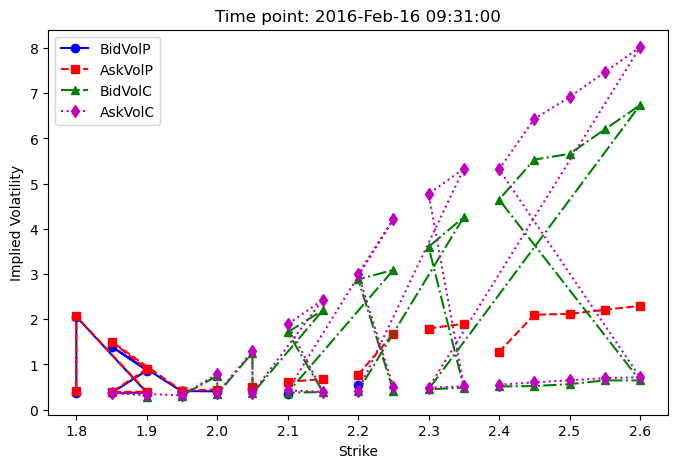

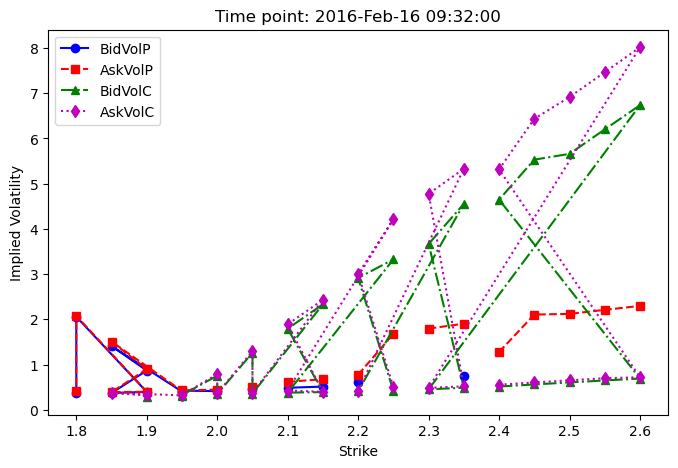

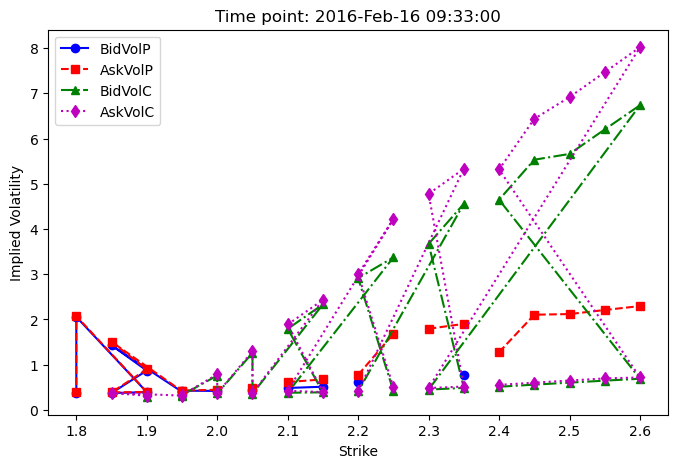

In [22]:
for m in minutes:
    data = pd.read_csv(f"{m}.csv",encoding="utf-8")
    data.drop_duplicates('Strike')
    
        
    plt.figure(figsize=(8, 5))  

    plt.plot(data['Strike'], data['BidVolP'], marker='o', color='b', linestyle='-', label='BidVolP')
    plt.plot(data['Strike'], data['AskVolP'], marker='s', color='r', linestyle='--', label='AskVolP')
    plt.plot(data['Strike'], data['BidVolC'], marker='^', color='g', linestyle='-.', label='BidVolC')
    plt.plot(data['Strike'], data['AskVolC'], marker='d', color='m', linestyle=':', label='AskVolC')

    # title and tag
    plt.title(f"Time point: 2016-Feb-16 09:{m}:00")
    plt.xlabel('Strike')
    plt.ylabel('Implied Volatility')
    plt.legend()
    plt.savefig(f'{m}.png')
    plt.show()


## 3.3
#### assume no transaction cost

In [23]:
for i in range(0, len(df)):   
    #compute implied volotility   
    time = df.loc[df.index[i],'LocalTime']
    stockprice = df_S[df_S['LocalTime'] <= time].max()
    S = 0.5*(stockprice.Bid1 + stockprice.Ask1)
    K = df.loc[df.index[i],'Strike']
    T = (24-16)/365
    C_True = 0.5*(df.loc[df.index[i],'Bid1'] + df.loc[df.index[i],'Ask1'])
    cp_flag = df.loc[df.index[i],'OptionType']
    vol = 0.3 #assumption
   
    call_price = IV(S, K, C_true_bid, T, cp_flag).bs_price(vol)
    put_price = IV(S, K, C_true_bid, T, cp_flag).bs_price(vol)

    left = call_price + K * np.exp(-r * (T - t))
    right = put_price + S * np.exp(-q * (T - t)) 
    
    #putcall parity
    df.loc[df.index[i],'diff'] = left - right

df = df.drop_duplicates('diff')
df

,LocalTime,Symbol,Last,Bid1,BidQty1,Ask1,AskQty1,Type,Expiry,Strike,OptionType,diff
0,2016-02-16 09:30:00.048748,10000528,0.1130,0.1060,1,0.1130,1,Option,2016-02-24,2.05,P,NaN
1,2016-02-16 09:30:07.572073,10000528,0.1130,0.1078,10,0.1130,1,Option,2016-02-24,2.05,P,0.081533
88,2016-02-16 09:30:04.522190,10000539,0.0430,0.0411,1,0.0431,1,Option,2016-02-24,1.95,C,-0.018029
250,2016-02-16 09:30:04.522248,10000540,0.0409,0.0409,1,0.0420,5,Option,2016-02-24,1.95,P,-0.018029
430,2016-02-16 09:30:09.590458,10000512,0.0008,0.0006,10,0.0009,10,Option,2016-02-24,2.25,C,0.280659
583,2016-02-16 09:30:04.522120,10000533,0.0227,0.0227,1,0.0235,1,Option,2016-02-24,2.00,C,0.031752
721,2016-02-16 09:30:05.616643,10000508,0.0004,0.0003,20,0.0005,20,Option,2016-02-24,2.35,C,0.380221
736,2016-02-16 09:30:04.522288,10000566,0.0037,0.0028,10,0.0039,3,Option,2016-02-24,1.80,P,-0.167373
814,2016-02-16 09:30:04.522028,10000519,0.0059,0.0059,18,0.0087,3,Option,2016-02-24,2.10,C,0.131315
946,2016-02-16 09:30:04.522059,10000522,0.2091,0.1788,4,0.2085,1,Option,2016-02-24,2.15,P,0.181096
